In [1]:
# import libraries and functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import expon, gamma, kappa4, lognorm
from scipy.stats import genpareto, gumbel_r, gumbel_l
from scipy.stats import anderson, kstest

**Part 1: Preprocess and transform data**

In [2]:
# read data into dataframe

df = pd.read_csv("preprocessed.txt", sep=" ", header=None)

df.head()

,0
0,1
1,2
2,6
3,1
4,5


In [4]:
# transform from hundredths of inches to meters

df['inches'] = df[0].multiply(.01) 
df['m'] = df['inches'].divide(39.37)

m_precip = df.drop([0, 'inches'], axis='columns')

m_precip.head()

,m
0,0.000254
1,0.000508
2,0.001524
3,0.000254
4,0.001270


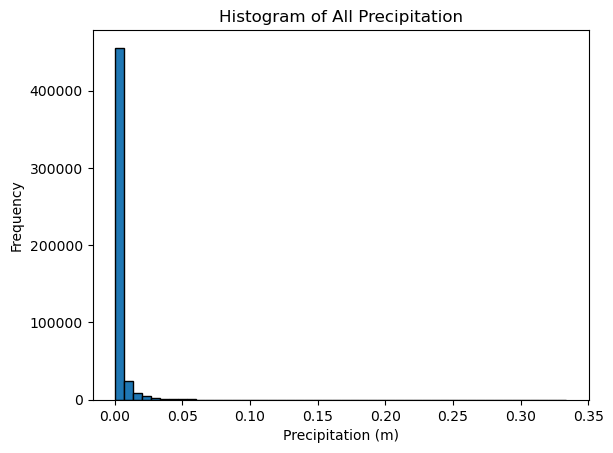

In [5]:
# plot histogram

plt.hist(m_precip['m'], bins=50, edgecolor='black')
plt.title('Histogram of All Precipitation')
plt.xlabel('Precipitation (m)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# examine descriptive statistics

m_precip['m'].describe()

count    500086.000000
mean          0.002741
std           0.006404
min           0.000254
25%           0.000254
50%           0.000762
75%           0.002286
max           0.333503
Name: m, dtype: float64

In [7]:
m_precip['m'].median()

0.000762001524003048

**Part 2: Split into light and heavy precip**

In [8]:
threshold = 0.01

# create df with only light precip values

light_precip = m_precip[m_precip < threshold]
light_precip.dropna(inplace=True)
light_precip.reset_index(inplace=True)
light_precip.drop('index', axis='columns',inplace=True)
light_precip.head()

,m
0,0.000254
1,0.000508
2,0.001524
3,0.000254
4,0.001270


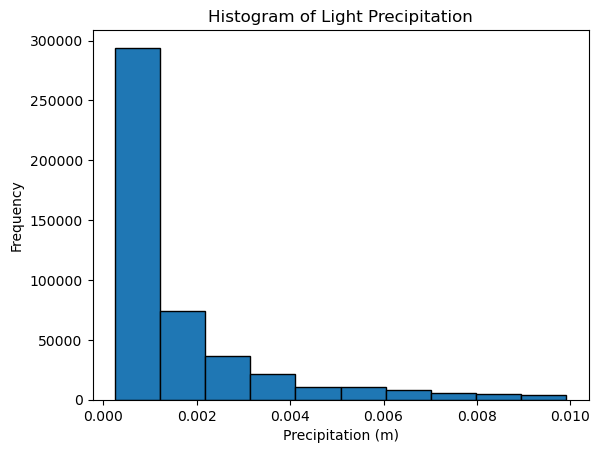

In [9]:
# plot histogram of light precip

plt.hist(light_precip['m'], edgecolor='black')
plt.title('Histogram of Light Precipitation')
plt.xlabel('Precipitation (m)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# create df of only heavy precip values

heavy_precip = m_precip[m_precip >= threshold]
heavy_precip.dropna(inplace=True)
heavy_precip.reset_index(inplace=True)
heavy_precip.drop('index', axis='columns', inplace=True)
heavy_precip.head()

,m
0,0.011430
1,0.010160
2,0.012700
3,0.030988
4,0.016510


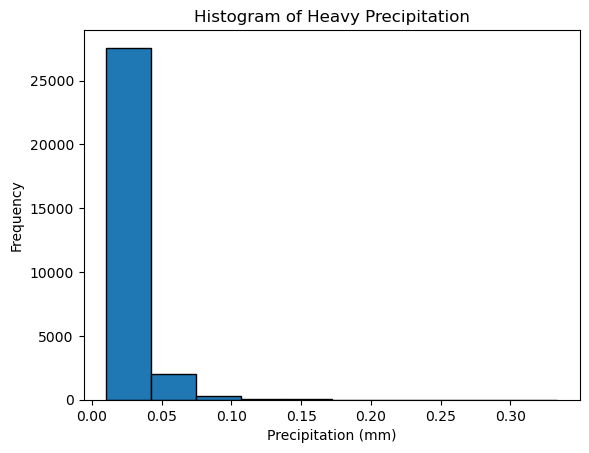

In [11]:
# plot histogram of heavy precip

plt.hist(heavy_precip['m'], edgecolor='black')
plt.title('Histogram of Heavy Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# descriptive statistics of light precip
light_precip.describe()
light_count = light_precip['m'].count()

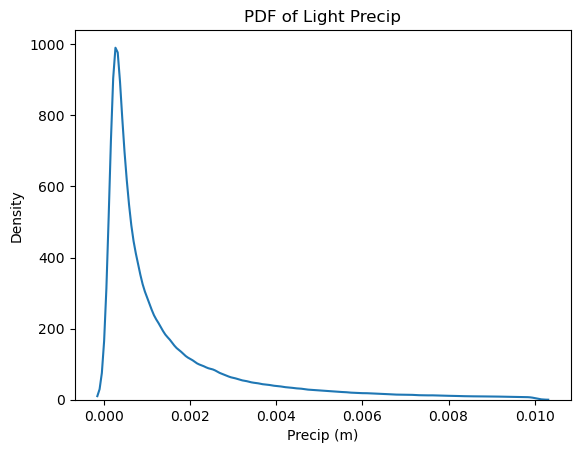

In [13]:
# plot pdf of light precip

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False)
plt.title('PDF of Light Precip')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

In [14]:
# descriptive stats of heavy precip

heavy_precip.describe()
heavy_count = heavy_precip['m'].count()

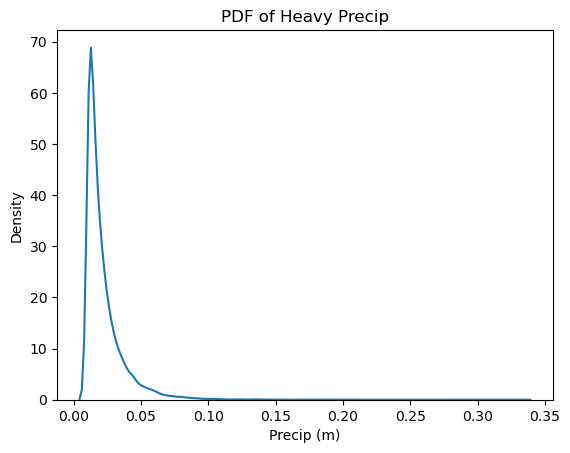

In [15]:
# plot pdf of heavy precip

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False)
plt.title('PDF of Heavy Precip')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

**Part 3: Fitting pdfs**

**Part 3a: Fitting light precipitation**

-0.0003509859403804784 0.0018624428918825233


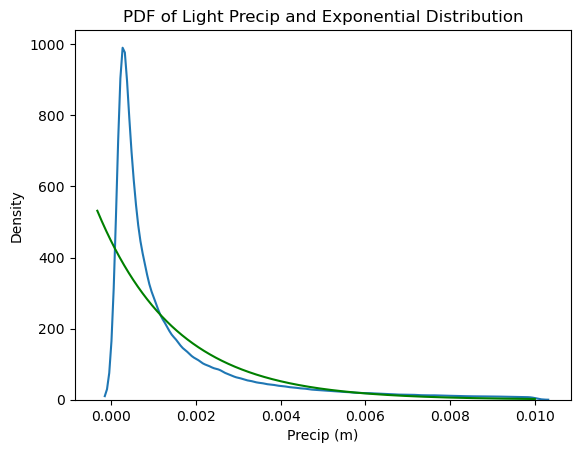

              values
count  470118.000000
mean        0.004834
std         0.002983
min        -0.000332
25%         0.002251
50%         0.004834
75%         0.007417
max         0.010000


In [16]:
# fit light precipitation to exponential pdf

# generate parameters for exponential distribution
loc_exp, scale_exp = expon.fit(light_precip, method='MM')
print(loc_exp, scale_exp) 

# generate sample exponential distribution given params
x = np.linspace(expon.ppf(0.01, loc_exp, scale_exp), threshold, light_count)
pdf = expon.pdf(x, loc_exp, scale_exp)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot exponential pdf

plt.title('PDF of Light Precip and Exponential Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.83236506215592 -0.0001877249993120526 0.002041390284225798
              values
count  470118.000000
mean        0.004910
std         0.002939
min        -0.000180
25%         0.002365
50%         0.004910
75%         0.007455
max         0.010000


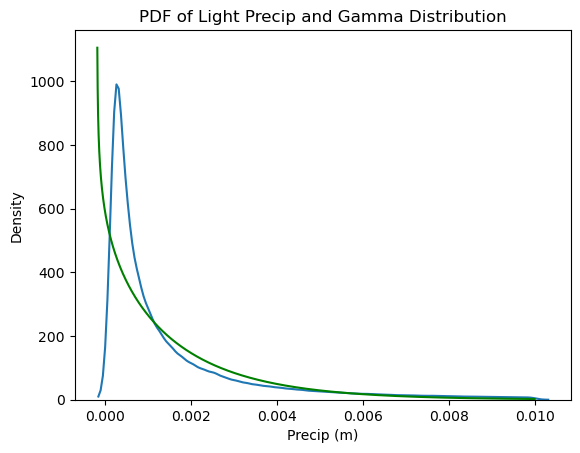

In [17]:
# fit light precip to gamma pdf

# generate params for gamma pdf
shape_gam, loc_gam, scale_gam = gamma.fit(light_precip, method='MM')
print(shape_gam, loc_gam, scale_gam)

# generate sample gamma dist given params
x = np.linspace(gamma.ppf(0.01, shape_gam, loc_gam, scale_gam), threshold, light_count)
pdf = gamma.pdf(x, shape_gam, loc_gam, scale_gam)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gamma pdf

plt.title('PDF of Light Precip and Gamma Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

1.0979044771016881 0.9835925241340484 -0.0007023280904908434 0.010716217100204907


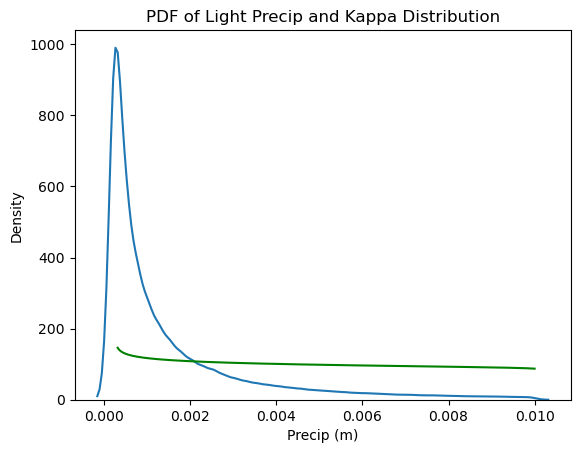

              values
count  470118.000000
mean        0.005158
std         0.002795
min         0.000316
25%         0.002737
50%         0.005158
75%         0.007579
max         0.010000


In [18]:
# fit light precip to kappa pdf

# generate params for kappa dist
h_kap, k_kap, loc_kap, scale_kap = kappa4.fit(light_precip)
print(h_kap, k_kap, loc_kap, scale_kap)

# generate sample kappa dist given params
x = np.linspace(kappa4.ppf(0.01, h_kap, k_kap, loc_kap, scale_kap), threshold, light_count)
pdf = kappa4.pdf(x, h_kap, k_kap, loc_kap, scale_kap)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot kappa pdf

plt.title('PDF of Light Precip and Kappa Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.5877325007143138 -0.0013880546266667538 0.002439584063205784


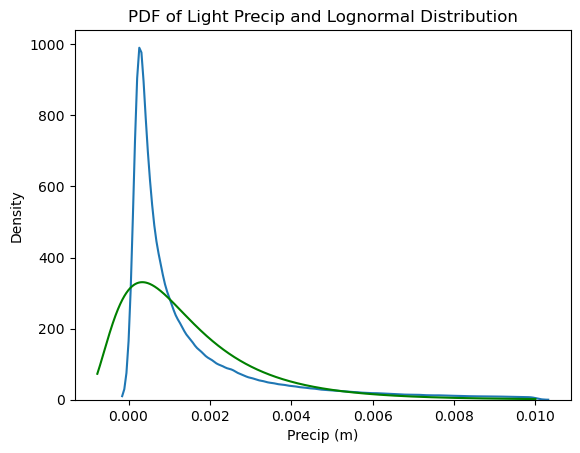

              values
count  470118.000000
mean        0.004617
std         0.003108
min        -0.000766
25%         0.001925
50%         0.004617
75%         0.007308
max         0.010000


In [19]:
# fit light precip to ln pdf

# generate params for ln dist
shape_ln, loc_ln, scale_ln = lognorm.fit(light_precip, method='MM')
print(shape_ln, loc_ln, scale_ln)

# generate sample ln dist given params
x = np.linspace(lognorm.ppf(0.01, shape_ln, loc_ln, scale_ln), threshold, light_count)
pdf = lognorm.pdf(x, shape_ln, loc_ln, scale_ln)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot ln pdf

plt.title('PDF of Light Precip and Lognormal Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

1.4887959149187076 0.00025400050798500106 0.00016846924269069586


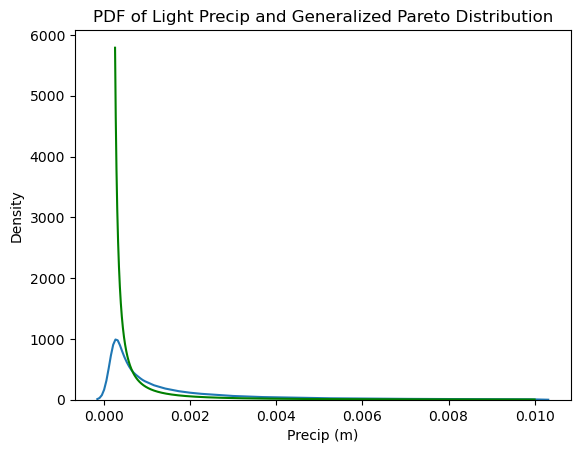

              values
count  470118.000000
mean        0.005128
std         0.002813
min         0.000256
25%         0.002692
50%         0.005128
75%         0.007564
max         0.010000


In [20]:
# fit light precipitation to generalized pareto pdf

# generate params for generalized pareto dist
shape_gp, loc_gp, scale_gp = genpareto.fit(light_precip)
print(shape_gp, loc_gp, scale_gp)

# generate sample generalized pareto dist given params
x = np.linspace(genpareto.ppf(0.01, shape_gp, loc_gp, scale_gp), threshold, light_count)
pdf = genpareto.pdf(x, shape_gp, loc_gp, scale_gp)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot generalized pareto pdf

plt.title('PDF of Light Precip and Generalized Pareto Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.0006732585541396358 0.0014521407652812008


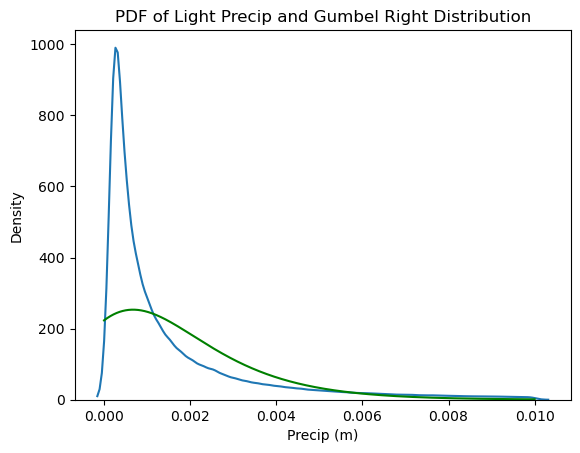

              values
count  470118.000000
mean        0.005000
std         0.002887
min         0.000000
25%         0.002500
50%         0.005000
75%         0.007500
max         0.010000


In [21]:
# fit light precipitation to gumbel right pdf

# generate params for gumbel right dist
loc_gum, scale_gum = gumbel_r.fit(light_precip, method='MM')
print(loc_gum, scale_gum)

# generate sample gumbel right dist given params
x = np.linspace(0, threshold, light_count)
pdf = gumbel_r.pdf(x, loc_gum, scale_gum)

sns.kdeplot(light_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gumbel right pdf

plt.title('PDF of Light Precip and Gumbel Right Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

In [22]:
# perform KS tests

dists = {
    'expon': (loc_exp, scale_exp),
    'gamma': (shape_gam, loc_gam, scale_gam),
    'kappa4': (h_kap, k_kap, loc_kap, scale_kap),
    'lognorm': (shape_ln, loc_ln, scale_ln),
    'genpareto': (shape_gp, loc_gp, scale_gp),
    'gumbel_r': (loc_gum, scale_gum)
}

for dist in dists:
    print(dist + ': ' + str(kstest(light_precip['m'], dist, dists[dist])) + '\n')

expon: KstestResult(statistic=0.277353346406305, pvalue=0.0, statistic_location=0.00025400050800101603, statistic_sign=-1)

gamma: KstestResult(statistic=0.27012368787810526, pvalue=0.0, statistic_location=0.00025400050800101603, statistic_sign=-1)

kappa4: KstestResult(statistic=0.5720701110623919, pvalue=0.0, statistic_location=0.0020320040640081282, statistic_sign=1)

lognorm: KstestResult(statistic=0.2502923710293121, pvalue=0.0, statistic_location=0.00025400050800101603, statistic_sign=-1)

genpareto: KstestResult(statistic=0.3093712641407259, pvalue=0.0, statistic_location=0.00025400050800101603, statistic_sign=1)

gumbel_r: KstestResult(statistic=0.2632333847302973, pvalue=0.0, statistic_location=0.00025400050800101603, statistic_sign=-1)



**Part 3b: Fitting heavy precipitation**

0.006732486571440483 0.015299896187932616


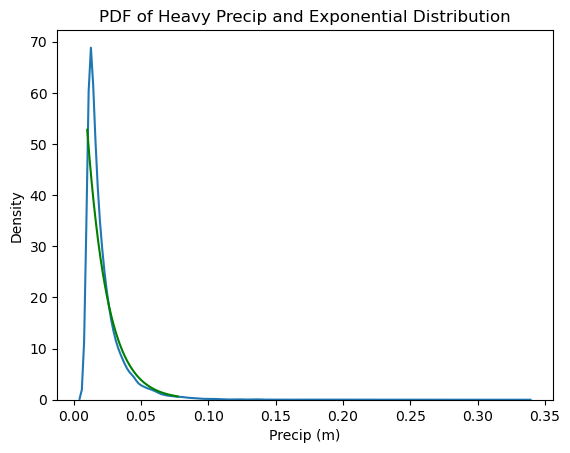

             values
count  29968.000000
mean       0.043596
std        0.019397
min        0.010000
25%        0.026798
50%        0.043596
75%        0.060393
max        0.077191


In [23]:
# fit heavy precipitation to exponential pdf

# generate parameters for exponential distribution
loc_h_exp, scale_h_exp = expon.fit(heavy_precip, method='MM')
print(loc_h_exp, scale_h_exp) 

# generate sample exponential distribution given params
x = np.linspace(threshold, expon.ppf(0.99, loc_h_exp, scale_h_exp), heavy_count)
pdf = expon.pdf(x, loc_h_exp, scale_h_exp)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot exponential pdf

plt.title('PDF of Heavy Precip and Exponential Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.27092703688985886 0.014068687045177644 0.02939424505437222


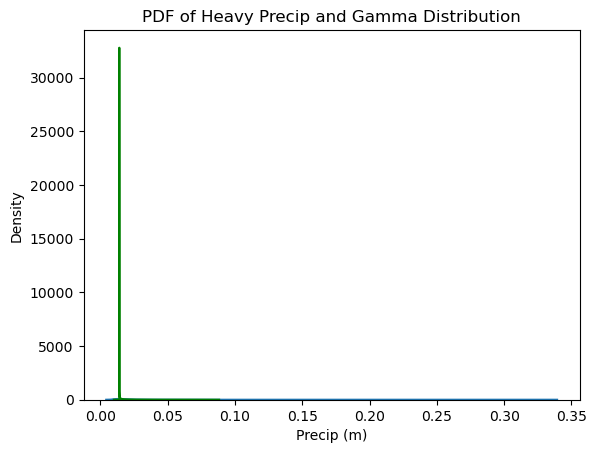

,values
count,29968.000000
mean,0.049108
std,0.022580
min,0.010000
25%,0.029554
50%,0.049108
75%,0.068663
max,0.088217


In [24]:

# fit heavy precipitation to gamma pdf

# generate params for gamma dist
shape_h_gam, loc_h_gam, scale_h_gam = gamma.fit(heavy_precip, method='MM')
print(shape_h_gam, loc_h_gam, scale_h_gam)

# generate sample gamma dist given params
x = np.linspace(threshold, gamma.ppf(0.99, shape_h_gam, loc_h_gam, scale_h_gam), heavy_count)
pdf = gamma.pdf(x, shape_h_gam, loc_h_gam, scale_h_gam)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gamma pdf

plt.title('PDF of Heavy Precip and Gamma Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
xdf.describe()

1.0982037943285217 0.9661816858591668 -0.02185850249254488 0.3575021075041829


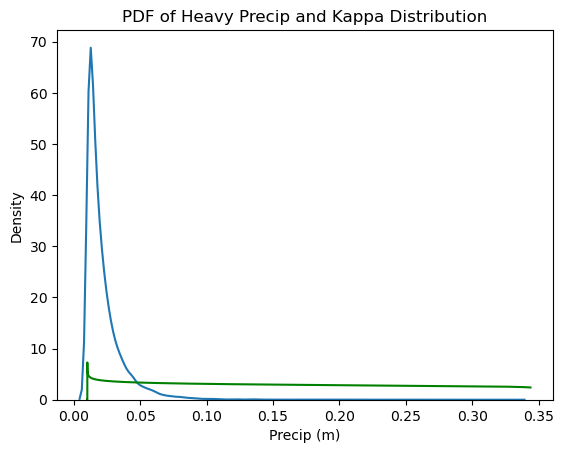

,values
count,29968.000000
mean,0.176918
std,0.096375
min,0.010000
25%,0.093459
50%,0.176918
75%,0.260376
max,0.343835


In [25]:
# fit heavy precipitation to kappa pdf
h_h_kap, k_h_kap, loc_h_kap, scale_h_kap = kappa4.fit(heavy_precip)
print(h_h_kap, k_h_kap, loc_h_kap, scale_h_kap)

# generate sample kappa dist given params
x = np.linspace(threshold, kappa4.ppf(0.99, h_h_kap, k_h_kap, loc_h_kap, scale_h_kap), heavy_count)
pdf = kappa4.pdf(x, h_h_kap, k_h_kap, loc_h_kap, scale_h_kap)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot kappa pdf

plt.title('PDF of Heavy Precip and Kappa Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
xdf.describe()

0.25313721537510014 -0.05353472127225942 0.0719902588265


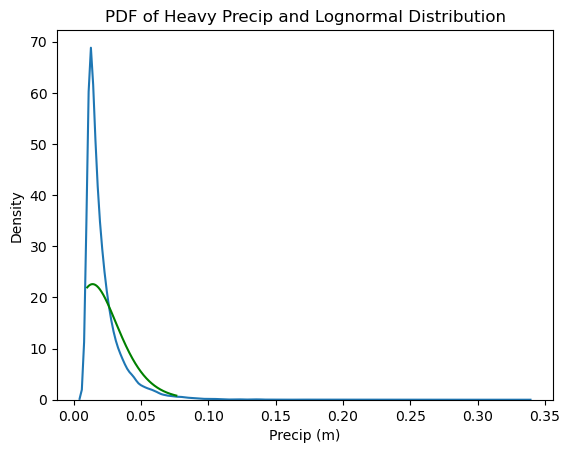

             values
count  29968.000000
mean       0.043095
std        0.019108
min        0.010000
25%        0.026548
50%        0.043095
75%        0.059643
max        0.076190


In [26]:
# fit heavy precip to ln pdf

# generate params for ln dist
shape_h_ln, loc_h_ln, scale_h_ln = lognorm.fit(heavy_precip, method='MM')
print(shape_h_ln, loc_h_ln, scale_h_ln)

# generate sample ln dist given params
x = np.linspace(threshold, lognorm.ppf(0.99, shape_h_ln, loc_h_ln, scale_h_ln), heavy_count)
pdf = lognorm.pdf(x, shape_h_ln, loc_h_ln, scale_h_ln)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot ln pdf

plt.title('PDF of Heavy Precip and Lognormal Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.23405066364552551 0.010102292506178884 0.009250488826989995


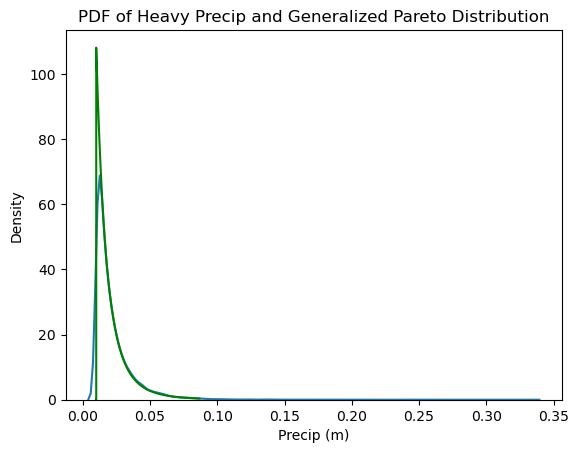

             values
count  29968.000000
mean       0.048356
std        0.022146
min        0.010000
25%        0.029178
50%        0.048356
75%        0.067534
max        0.086712


In [27]:
# fit heavy precipitation to generalized pareto pdf

# generate params for generalized pareto dist
shape_h_gp, loc_h_gp, scale_h_gp = genpareto.fit(heavy_precip)
print(shape_h_gp, loc_h_gp, scale_h_gp)

# generate sample generalized pareto dist given params
x = np.linspace(threshold, genpareto.ppf(0.99, shape_h_gp, loc_h_gp, scale_h_gp), heavy_count)
pdf = genpareto.pdf(x, shape_h_gp, loc_h_gp, scale_h_gp)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot generalized pareto pdf

plt.title('PDF of Heavy Precip and Generalized Pareto Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.015146615404877878 0.011929280116938376


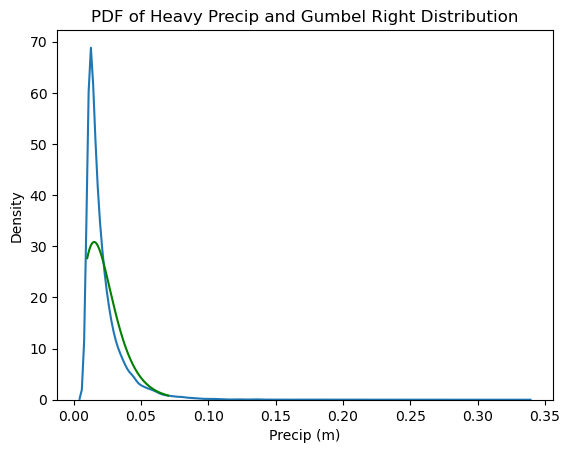

             values
count  29968.000000
mean       0.040012
std        0.017328
min        0.010000
25%        0.025006
50%        0.040012
75%        0.055017
max        0.070023


In [28]:
# fit heavy precipitation to gumbel right pdf

# generate params for gumbel right dist
loc_h_gum, scale_h_gum = gumbel_r.fit(heavy_precip, method='MM')
print(loc_h_gum, scale_h_gum)

# generate sample gumbel right dist given params
x = np.linspace(threshold, gumbel_r.ppf(0.99, loc_h_gum, scale_h_gum), heavy_count)
pdf = gumbel_r.pdf(x, loc_h_gum, scale_h_gum)

sns.kdeplot(heavy_precip['m'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gumbel right pdf

plt.title('PDF of Heavy Precip and Gumbel Right Distribution')
plt.xlabel('Precip (m)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

In [29]:
# perform KS tests

dists = {
    'expon': (loc_h_exp, scale_h_exp),
    'gamma': (shape_gam, loc_gam, scale_gam),
    'kappa4': (h_kap, k_kap, loc_kap, scale_kap),
    'lognorm': (shape_h_ln, loc_h_ln, scale_h_ln),
    'genpareto': (shape_h_gp, loc_h_gp, scale_h_gp),
    'gumbel_r': (loc_h_gum, scale_h_gum)
}

for dist in dists:
    print(dist + ': ' + str(kstest(heavy_precip['m'], dist, dists[dist])) + '\n')

expon: KstestResult(statistic=0.2007035163568334, pvalue=0.0, statistic_location=0.010160020320040642, statistic_sign=-1)

gamma: KstestResult(statistic=0.9958762826038787, pvalue=0.0, statistic_location=0.010160020320040642, statistic_sign=-1)

kappa4: KstestResult(statistic=0.9972815496733207, pvalue=0.0, statistic_location=0.010160020320040642, statistic_sign=-1)

lognorm: KstestResult(statistic=0.31431855507633744, pvalue=0.0, statistic_location=0.010160020320040642, statistic_sign=-1)

genpareto: KstestResult(statistic=0.02406488530887324, pvalue=1.6513742648739788e-15, statistic_location=0.011176022352044705, statistic_sign=1)

gumbel_r: KstestResult(statistic=0.21894372688540797, pvalue=0.0, statistic_location=0.010160020320040642, statistic_sign=-1)

